# Часть I: Исследование одной характеристики

Гипотезы:
- H0: выборки из распределения t(3)
- H1: выборки из нормального распределения N(0,1)

Методы:
- KNN-граф → характеристика: максимальная степень
- Distance-граф → характеристика: максимальное независимое множество


In [1]:
# 1. Настройка среды и импорты

import sys
sys.path.append('..')  # Добавляем папку src

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import norm, chisquare

from data_generation import generate_sample
from graph_utils import build_knn_graph, build_distance_graph, max_degree, max_independent_set_size
from simulator import simulate_statistics, estimate_errors

%matplotlib inline


In [2]:
# 2. Параметры эксперимента

n = 1000
trials = 1000
alpha = 0.05
k_knn = 3
d_dist = 0.6
df = 5


In [3]:
# 3. Monte Carlo симуляции

# Симуляции для k-NN графа
stats0_knn, stats1_knn = simulate_statistics(n, trials, 'knn', k_knn, df)

# Симуляции для distance графа
stats0_dist, stats1_dist = simulate_statistics(n, trials, 'dist', d_dist, df)


KeyboardInterrupt: 

In [ ]:
# 4. Визуализация характеристик

# Гистограмма для максимальной степени (k-NN)
plt.figure(figsize=(8, 5))
plt.hist(stats0_knn['max_degree'], bins=30, alpha=0.5, label='H₀: N(0,1)', density=True)
plt.hist(stats1_knn['max_degree'], bins=30, alpha=0.5, label='H₁: Student(df=5)', density=True)
plt.title('Распределение максимальной степени (k-NN, k=3, n=1000)')
plt.xlabel('Максимальная степень (Δ(G))')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.savefig('knn_max_degree.png')
plt.show()


In [3]:
tri0 = [max_degree(build_knn_graph(x, k_knn)) for x in tqdm(h0_samples, desc='KNN H0')]
tri1 = [max_degree(build_knn_graph(x, k_knn)) for x in tqdm(h1_samples, desc='KNN H1')]

KNN H1: 100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.68it/s]


### Визуализация распределения треугольников


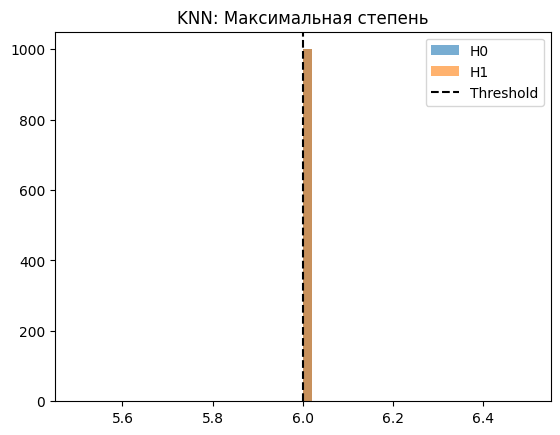

In [4]:
plt.hist(tri0, bins=50, alpha=0.6, label='H0')
plt.hist(tri1, bins=50, alpha=0.6, label='H1')
plt.axvline(np.percentile(tri0, 100*(1-alpha)), color='black', linestyle='--', label='Threshold')
plt.title('KNN: Максимальная степень')
plt.legend()
plt.show()

## 3. Характеристика DIST-графа: максимальное независимое множество


In [ ]:
clique0 = [max_independent_set_size(build_distance_graph(x, d_dist)) for x in tqdm(h0_samples, desc='DIST H0')]
clique1 = [max_independent_set_size(build_distance_graph(x, d_dist)) for x in tqdm(h1_samples, desc='DIST H1')]

In [ ]:
plt.hist(clique0, bins=50, alpha=0.6, label='H0')
plt.hist(clique1, bins=50, alpha=0.6, label='H1')
plt.axvline(np.percentile(clique0, 100*(1-alpha)), color='black', linestyle='--', label='Threshold')
plt.title('DIST: Максимальное независимое множество')
plt.legend()
plt.show()

## 4. χ²-тест по 10 равноправным бинам


In [ ]:
num_bins = 10
edges = norm.ppf(np.linspace(0, 1, num_bins + 1))

def stat_chi2(x):
    obs, _ = np.histogram(x, bins=edges)
    exp = np.full(num_bins, len(x)/num_bins)
    return chisquare(f_obs=obs, f_exp=exp)

p0 = [stat_chi2(x)[1] for x in tqdm(h0_samples, desc='Chi2 H0')]
p1 = [stat_chi2(x)[1] for x in tqdm(h1_samples, desc='Chi2 H1')]

In [ ]:
plt.hist(p0, bins=50, range=(0,1), alpha=0.6, label='H0')
plt.hist(p1, bins=50, range=(0,1), alpha=0.6, label='H1')
plt.axvline(alpha, color='red', linestyle='--')
plt.title('p-значения χ²-теста')
plt.legend()
plt.show()